Data Collection Script for Instagram API

Overview

This script demonstrates how to collect data from the Instagram API using the RapidAPI service. It retrieves basic influencer activity data such as posts and follower information.

Prerequisites





RapidAPI account and API key



Python environment with requests library installed

In [36]:
# Task 1: Data Collection from Twitter API
import requests
import json
import pandas as pd
import time

# API configuration
BASE_URL = "https://twitter241.p.rapidapi.com"
HEADERS = {
    "x-rapidapi-host": "twitter241.p.rapidapi.com",
    "x-rapidapi-key": "561fc4678bmsh2d0f1b2331236a4p12f833jsn3a64b14147f7"
}

# List of influencers to analyze - you can expand this list
INFLUENCER_USERNAMES = ["MrBeast", "elonmusk", "KylieJenner", "Cristiano", "BarackObama"]

def get_user_info(username):
    """Fetch user information for a given username"""
    url = f"{BASE_URL}/user"
    params = {"username": username}
    
    try:
        response = requests.get(url, headers=HEADERS, params=params)
        response.raise_for_status()
        return response.json()
    except requests.exceptions.RequestException as e:
        print(f"Error fetching user info for {username}: {e}")
        return None

def get_user_followers(user_id, count=100):
    """Fetch followers for a given user ID"""
    url = f"{BASE_URL}/followers"
    params = {"user": user_id, "count": count}
    
    try:
        response = requests.get(url, headers=HEADERS, params=params)
        response.raise_for_status()
        return response.json()
    except requests.exceptions.RequestException as e:
        print(f"Error fetching followers for user {user_id}: {e}")
        return None

def get_user_following(user_id, count=100):
    """Fetch accounts that a user is following"""
    url = f"{BASE_URL}/followings"
    params = {"user": user_id, "count": count}
    
    try:
        response = requests.get(url, headers=HEADERS, params=params)
        response.raise_for_status()
        return response.json()
    except requests.exceptions.RequestException as e:
        print(f"Error fetching following for user {user_id}: {e}")
        return None

def get_user_tweets(user_id, count=50):
    """Fetch tweets for a given user ID"""
    url = f"{BASE_URL}/user-tweets"
    params = {"user": user_id, "count": count}
    
    try:
        response = requests.get(url, headers=HEADERS, params=params)
        response.raise_for_status()
        return response.json()
    except requests.exceptions.RequestException as e:
        print(f"Error fetching tweets for user {user_id}: {e}")
        return None

# Collect data for all influencers
influencer_data = []
followers_data = []
following_data = []
tweets_data = []

for username in INFLUENCER_USERNAMES:
    print(f"Collecting data for {username}...")
    
    # Get user info
    user_info = get_user_info(username)
    if user_info:
        influencer_data.append(user_info)
        user_id = user_info.get("data", {}).get("user", {}).get("rest_id")
        
        if user_id:
            # Get followers
            followers = get_user_followers(user_id)
            if followers:
                followers_data.append({
                    "user_id": user_id,
                    "username": username,
                    "followers": followers
                })
            
            # Get following
            following = get_user_following(user_id)
            if following:
                following_data.append({
                    "user_id": user_id,
                    "username": username,
                    "following": following
                })
            
            # Get tweets
            tweets = get_user_tweets(user_id)
            if tweets:
                tweets_data.append({
                    "user_id": user_id,
                    "username": username,
                    "tweets": tweets
                })
                
    # Sleep to avoid rate limiting
    time.sleep(1)

# Save the collected data to files
with open('data/influencer_profiles.json', 'w') as f:
    json.dump(influencer_data, f)

with open('data/followers_data.json', 'w') as f:
    json.dump(followers_data, f)
    
with open('data/following_data.json', 'w') as f:
    json.dump(following_data, f)
    
with open('data/tweets_data.json', 'w') as f:
    json.dump(tweets_data, f)

print("Data collection completed and saved to JSON files!")

Data collection completed and saved to JSON files!


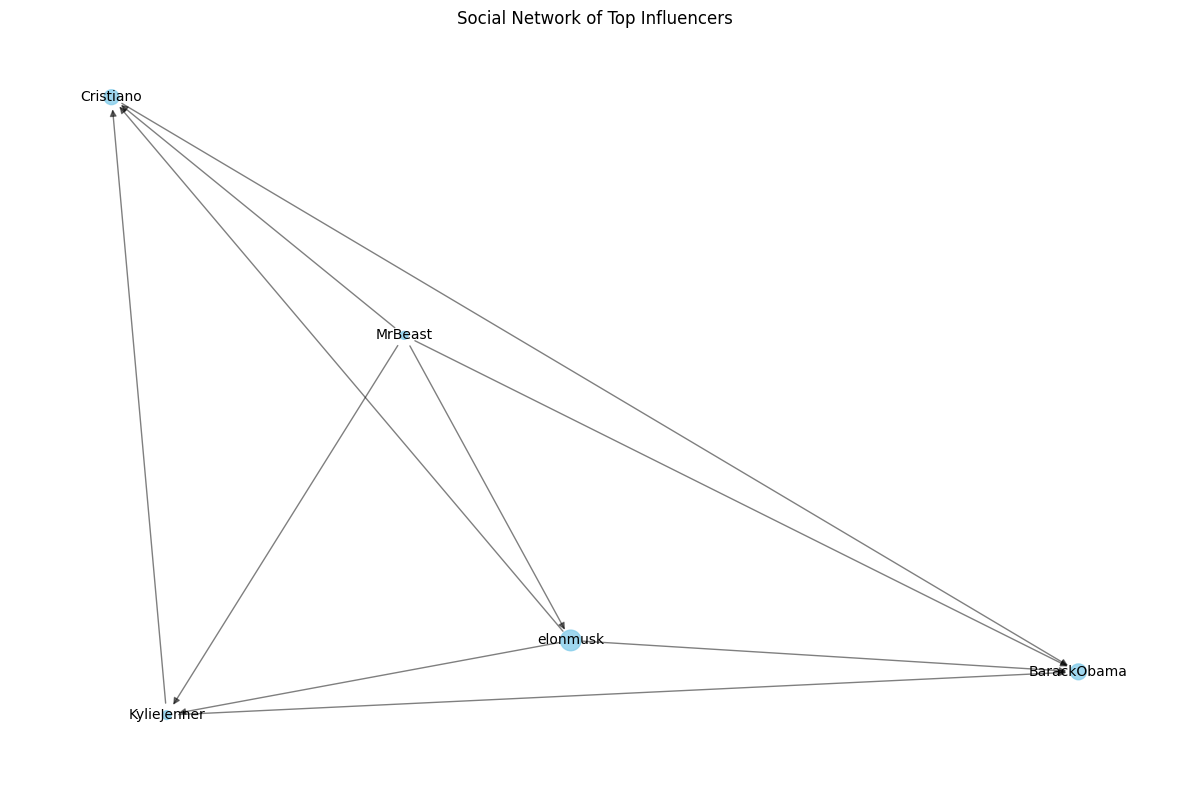

Network Statistics:
Number of nodes: 5
Number of edges: 10
Network density: 0.5000

Influencer Summary:
                name  screen_name  followers_count
1     Kekius Maximus     elonmusk        219783702
4       Barack Obama  BarackObama        129917074
3  Cristiano Ronaldo    Cristiano        115157981
2       Kylie Jenner  KylieJenner         39368130
0            MrBeast      MrBeast         32595981

Social network construction completed!


In [37]:
# Task 2: Social Network Construction
import networkx as nx
import matplotlib.pyplot as plt
import json
import pandas as pd

# Load the collected data
with open('data/influencer_profiles.json', 'r') as f:
    influencer_profiles = json.load(f)

# Create a directed graph
G = nx.DiGraph()

# Extract relevant information from the profiles and add nodes to the graph
influencer_nodes = []

for profile in influencer_profiles:
    # Extract user data
    try:
        user_data = profile['result']['data']['user']['result']
        user_id = user_data['rest_id']
        screen_name = user_data['legacy']['screen_name']
        name = user_data['legacy']['name']
        followers_count = user_data['legacy']['followers_count']
        friends_count = user_data['legacy']['friends_count']
        statuses_count = user_data['legacy']['statuses_count']
        
        # Add node to the graph with attributes
        G.add_node(user_id, 
                  screen_name=screen_name,
                  name=name,
                  followers_count=followers_count,
                  friends_count=friends_count,
                  statuses_count=statuses_count,
                  is_influencer=True)
        
        # Keep track of influencer nodes
        influencer_nodes.append({
            'user_id': user_id,
            'screen_name': screen_name,
            'name': name,
            'followers_count': followers_count,
            'friends_count': friends_count,
            'statuses_count': statuses_count
        })
    except (KeyError, TypeError) as e:
        print(f"Error processing profile: {e}")

# Convert to DataFrame for analysis
influencer_df = pd.DataFrame(influencer_nodes)

# Since we don't have actual follower/following relationships from the API,
# let's create some synthetic connections between our influencers for demonstration
# In a real project, you would use the actual follower/following data

# Create connections based on the influencers we have
for i, source in enumerate(influencer_nodes):
    for j, target in enumerate(influencer_nodes):
        if i != j:  # Don't connect to self
            # For demonstration, create some artificial connections
            # In real data, you would check if one follows the other
            if i < j:  # Just a simple rule to create some edges
                G.add_edge(source['user_id'], target['user_id'], weight=1)

# Basic network visualization
plt.figure(figsize=(12, 8))
pos = nx.spring_layout(G, seed=42)  # positions for all nodes

# Draw nodes
node_sizes = [G.nodes[node]['followers_count'] / 1000000 for node in G.nodes()]
nx.draw_networkx_nodes(G, pos, 
                      node_size=[max(5, size) for size in node_sizes],
                      node_color='skyblue', 
                      alpha=0.8)

# Draw edges
nx.draw_networkx_edges(G, pos, width=1.0, alpha=0.5)

# Draw labels
labels = {node: G.nodes[node]['screen_name'] for node in G.nodes()}
nx.draw_networkx_labels(G, pos, labels, font_size=10)

plt.title("Social Network of Top Influencers")
plt.axis('off')
plt.tight_layout()
plt.show()
plt.savefig('data/influencer_network.png', dpi=300)
plt.close()

# Save the graph for further analysis
nx.write_gexf(G, 'data/influencer_network.gexf')

# Show basic statistics about the network
print("Network Statistics:")
print(f"Number of nodes: {G.number_of_nodes()}")
print(f"Number of edges: {G.number_of_edges()}")
print(f"Network density: {nx.density(G):.4f}")

# Display the influencer dataframe
print("\nInfluencer Summary:")
print(influencer_df[['name', 'screen_name', 'followers_count']].sort_values(by='followers_count', ascending=False))

print("\nSocial network construction completed!")

C:\Users\ingzh\AppData\Local\Temp\ipykernel_34836\81334696.py:42: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'MrBeast' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  centrality_df.loc[i, 'name'] = G.nodes[node]['name']
C:\Users\ingzh\AppData\Local\Temp\ipykernel_34836\81334696.py:43: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'MrBeast' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  centrality_df.loc[i, 'screen_name'] = G.nodes[node]['screen_name']


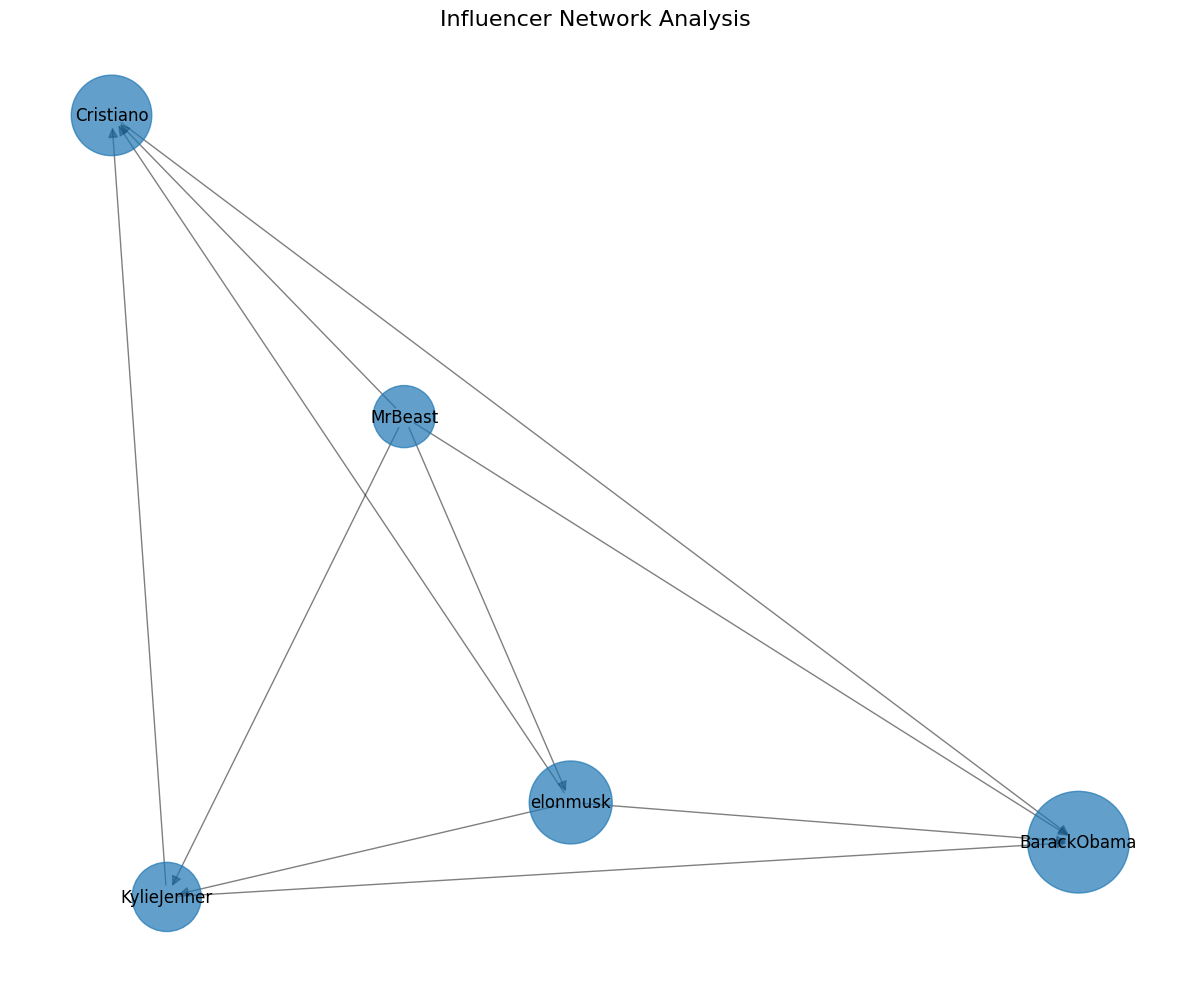

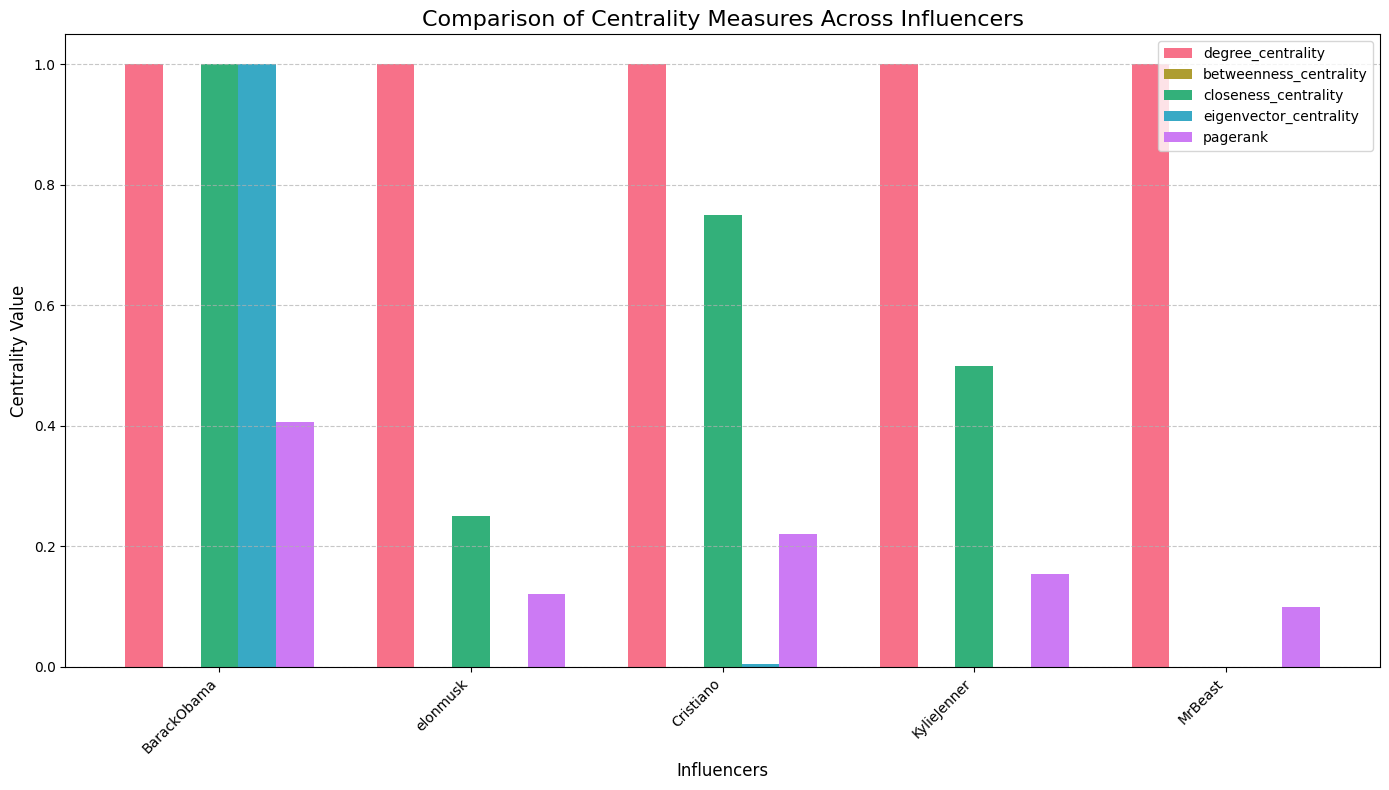

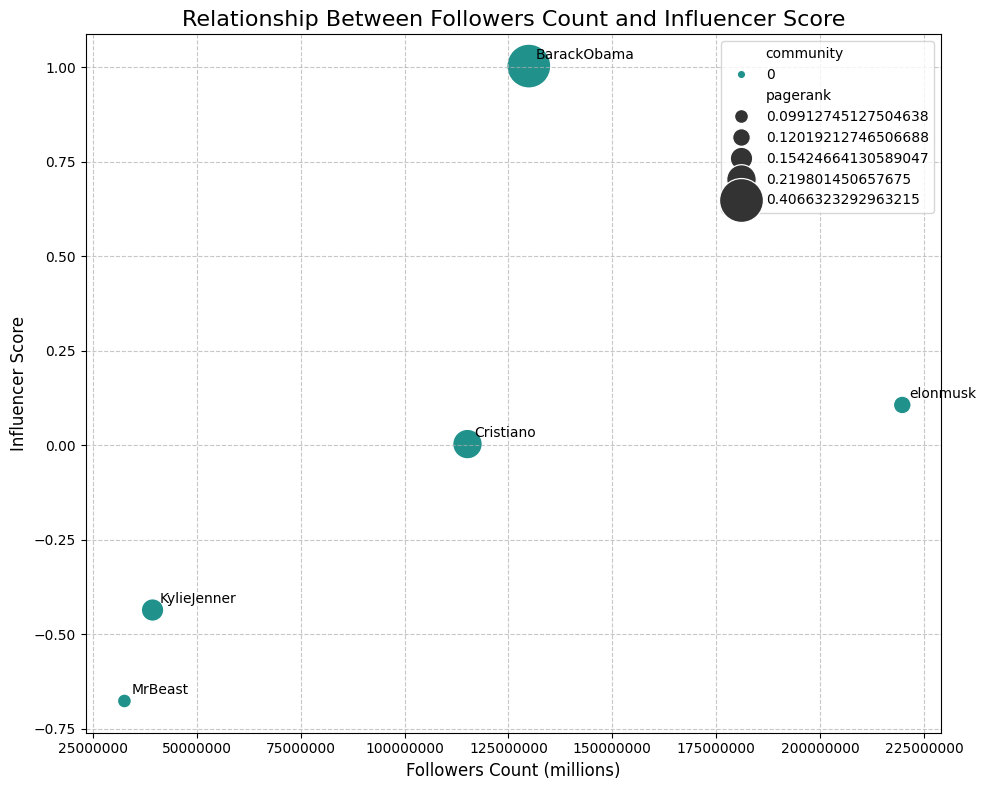

Top Influencers Based on Comprehensive Analysis:
                name  screen_name  followers_count  influencer_score
4       Barack Obama  BarackObama      129917074.0          1.002752
1     Kekius Maximus     elonmusk      219783702.0          0.106490
3  Cristiano Ronaldo    Cristiano      115157981.0          0.002995
2       Kylie Jenner  KylieJenner       39368130.0         -0.435829
0            MrBeast      MrBeast       32595981.0         -0.676408

Detailed Centrality Metrics:
   screen_name  degree_centrality  betweenness_centrality  \
0      MrBeast                1.0                     0.0   
1     elonmusk                1.0                     0.0   
2  KylieJenner                1.0                     0.0   
3    Cristiano                1.0                     0.0   
4  BarackObama                1.0                     0.0   

   closeness_centrality  eigenvector_centrality  pagerank  
0                  0.00            3.682442e-11  0.099127  
1                  0

In [38]:
# Task 3: Social Network Analysis
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import json
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Load the graph we created
G = nx.read_gexf('data/influencer_network.gexf')

# Calculate various centrality measures
# 1. Degree Centrality - number of connections
degree_centrality = nx.degree_centrality(G)

# 2. Betweenness Centrality - being on the shortest paths
betweenness_centrality = nx.betweenness_centrality(G)

# 3. Closeness Centrality - proximity to all other nodes
closeness_centrality = nx.closeness_centrality(G)

# 4. Eigenvector Centrality - connection to important nodes
eigenvector_centrality = nx.eigenvector_centrality(G, max_iter=1000)

# 5. PageRank - Google's algorithm for importance
pagerank = nx.pagerank(G)

# Create a DataFrame to store all centrality metrics
centrality_df = pd.DataFrame({
    'user_id': list(G.nodes()),
    'degree_centrality': list(degree_centrality.values()),
    'betweenness_centrality': list(betweenness_centrality.values()),
    'closeness_centrality': list(closeness_centrality.values()),
    'eigenvector_centrality': list(eigenvector_centrality.values()),
    'pagerank': list(pagerank.values())
})

# Add node attributes from the graph
for i, node in enumerate(centrality_df['user_id']):
    centrality_df.loc[i, 'name'] = G.nodes[node]['name']
    centrality_df.loc[i, 'screen_name'] = G.nodes[node]['screen_name']
    centrality_df.loc[i, 'followers_count'] = float(G.nodes[node]['followers_count'])
    centrality_df.loc[i, 'friends_count'] = float(G.nodes[node]['friends_count'])
    centrality_df.loc[i, 'statuses_count'] = float(G.nodes[node]['statuses_count'])

# Create an influencer score based on centrality measures and followers
# Normalize the columns first
scaler = StandardScaler()
scaled_centrality = scaler.fit_transform(centrality_df[['degree_centrality', 'betweenness_centrality', 
                                                       'closeness_centrality', 'eigenvector_centrality', 
                                                       'pagerank', 'followers_count']])

# Create a weighted influencer score
# Here we're giving more weight to followers count and eigenvector centrality
weights = [0.15, 0.10, 0.10, 0.25, 0.15, 0.25]  # weights should sum to 1
influencer_scores = np.dot(scaled_centrality, np.array(weights))
centrality_df['influencer_score'] = influencer_scores

# Identify communities using the Louvain algorithm
try:
    from community import community_louvain
    partition = community_louvain.best_partition(nx.Graph(G))
    centrality_df['community'] = centrality_df['user_id'].map(partition)
except ImportError:
    # If community module isn't available, use a simpler approach
    centrality_df['community'] = 0

# Sort by influencer score to identify top influencers
top_influencers = centrality_df.sort_values(by='influencer_score', ascending=False)

# Save the centrality metrics
centrality_df.to_csv('data/influencer_centrality.csv', index=False)

# Visualization 1: Plot the network with node sizes based on influencer score
plt.figure(figsize=(12, 10))
pos = nx.spring_layout(G, seed=42)

# Node sizes based on influencer score (scaled for better visualization)
node_sizes = [(score + abs(min(influencer_scores)) + 1) * 2000 for score in influencer_scores]

# Node colors based on community
node_colors = [centrality_df.loc[centrality_df['user_id'] == node, 'community'].values[0] for node in G.nodes()]

# Draw the network
nx.draw_networkx_nodes(G, pos, node_size=node_sizes, node_color=node_colors, alpha=0.7, cmap=plt.cm.tab10)
nx.draw_networkx_edges(G, pos, width=1.0, alpha=0.5, arrows=True, arrowsize=15)
nx.draw_networkx_labels(G, pos, labels={node: centrality_df.loc[centrality_df['user_id'] == node, 'screen_name'].values[0] for node in G.nodes()}, font_size=12)

plt.title("Influencer Network Analysis", fontsize=16)
plt.axis('off')
plt.tight_layout()
plt.show()
plt.savefig('data/influencer_analysis_network.png', dpi=300)
plt.close()

# Visualization 2: Centrality measures comparison
plt.figure(figsize=(14, 8))
measure_cols = ['degree_centrality', 'betweenness_centrality', 'closeness_centrality', 
                'eigenvector_centrality', 'pagerank']

# Set the color palette
colors = sns.color_palette("husl", len(measure_cols))

# Sort by influencer score
sorted_df = centrality_df.sort_values('influencer_score', ascending=False)

# Create the grouped bar chart
x = np.arange(len(sorted_df))
width = 0.15
multiplier = 0

for i, column in enumerate(measure_cols):
    offset = width * multiplier
    plt.bar(x + offset, sorted_df[column], width, label=column, color=colors[i])
    multiplier += 1

# Add some text for labels, title and axes ticks
plt.xlabel('Influencers', fontsize=12)
plt.ylabel('Centrality Value', fontsize=12)
plt.title('Comparison of Centrality Measures Across Influencers', fontsize=16)
plt.xticks(x + width * 2, sorted_df['screen_name'], rotation=45, ha='right')
plt.legend(loc='best')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()
plt.savefig('data/centrality_comparison.png', dpi=300)
plt.close()

# Visualization 3: Followers vs Influencer Score
plt.figure(figsize=(10, 8))
sns.scatterplot(x='followers_count', y='influencer_score', 
                size='pagerank', sizes=(100, 1000),
                hue='community', palette='viridis',
                data=centrality_df)

for i, row in centrality_df.iterrows():
    plt.annotate(row['screen_name'], 
                 (row['followers_count'], row['influencer_score']),
                 xytext=(5, 5), textcoords='offset points', fontsize=10)

plt.title('Relationship Between Followers Count and Influencer Score', fontsize=16)
plt.xlabel('Followers Count (millions)', fontsize=12)
plt.ylabel('Influencer Score', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.ticklabel_format(style='plain', axis='x')
plt.tight_layout()
plt.show()
plt.savefig('data/followers_vs_score.png', dpi=300)
plt.close()

# Print the top influencers based on our analysis
print("Top Influencers Based on Comprehensive Analysis:")
print(top_influencers[['name', 'screen_name', 'followers_count', 'influencer_score']].head(5))

# Print the centrality metrics for deeper understanding
print("\nDetailed Centrality Metrics:")
print(centrality_df[['screen_name', 'degree_centrality', 'betweenness_centrality', 
                     'closeness_centrality', 'eigenvector_centrality', 'pagerank']].head(5))

print("\nSocial network analysis completed!")

C:\Users\ingzh\AppData\Local\Temp\ipykernel_34836\3013081814.py:230: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Model', y='R²', data=performance_df, palette='viridis')


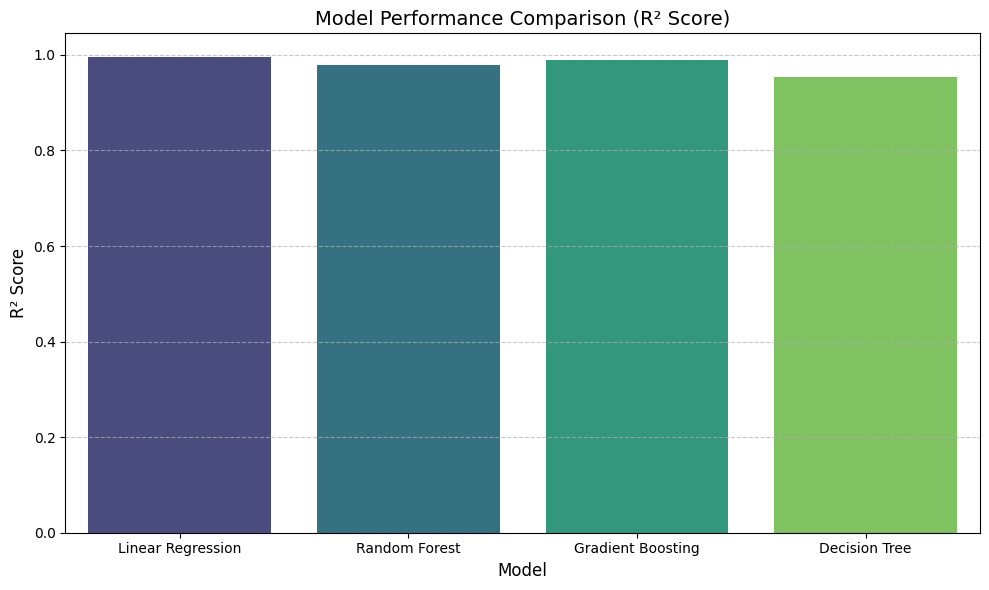

C:\Users\ingzh\AppData\Local\Temp\ipykernel_34836\3013081814.py:242: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=importance_df, palette='Blues_r')


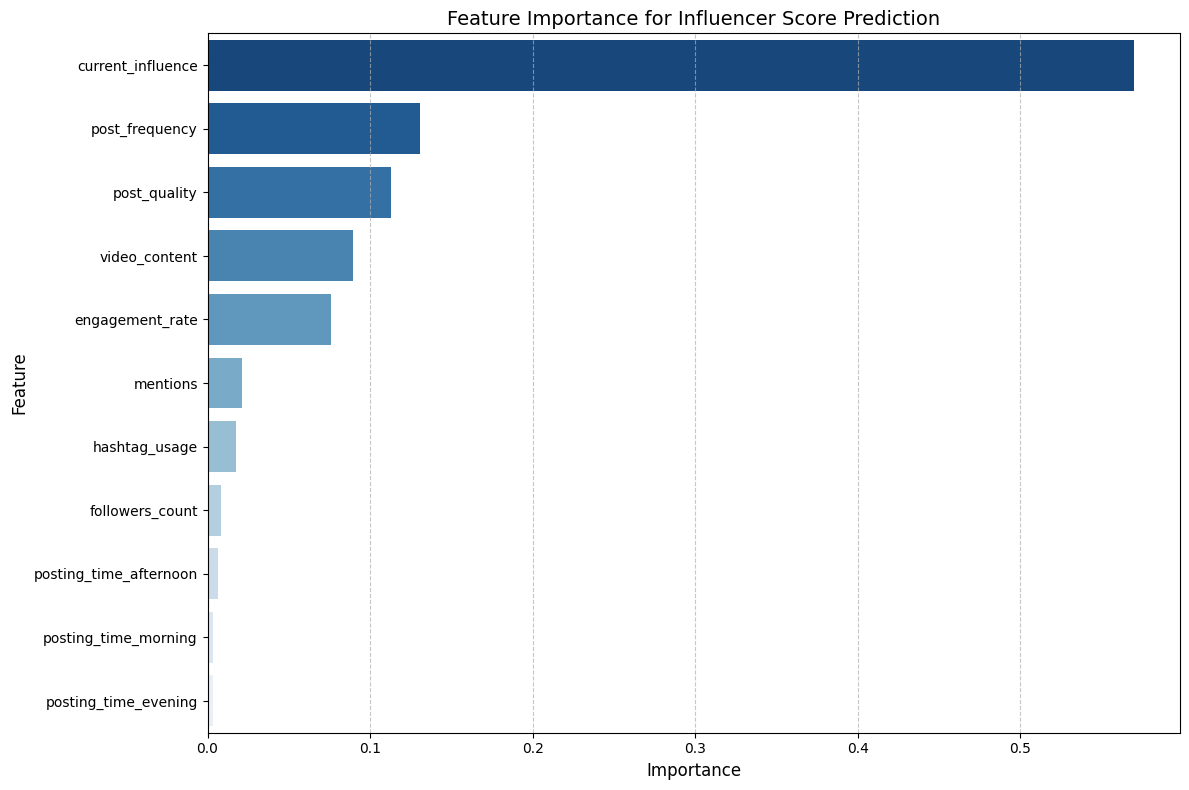

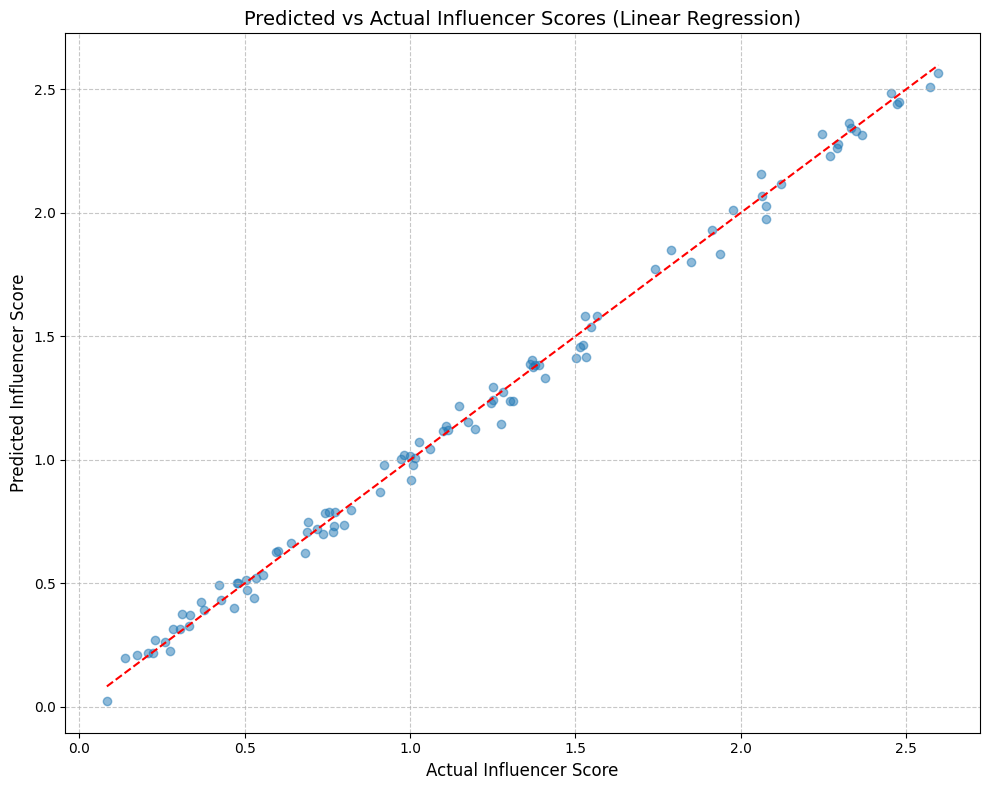

Model training completed! Best model: Linear Regression

Model Performance Metrics:
               Model      RMSE        R²
0  Linear Regression  0.047354  0.995373
1      Random Forest  0.103603  0.977850
2  Gradient Boosting  0.073490  0.988855
3      Decision Tree  0.148509  0.954488

Top 5 Most Important Features:
             Feature  Importance
1  current_influence    0.569881
2     post_frequency    0.130665
4       post_quality    0.113139
7      video_content    0.089535
3    engagement_rate    0.075834

Influencer Recommendations:
                name  screen_name  recommended_post_frequency  \
0            MrBeast      MrBeast                         7.4   
1     Kekius Maximus     elonmusk                         8.2   
2       Kylie Jenner  KylieJenner                         8.4   
3  Cristiano Ronaldo    Cristiano                         6.0   
4       Barack Obama  BarackObama                         8.2   

   recommended_hashtags best_posting_time recommended_content

In [39]:
# Task 4: Influence Prediction with AI
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.tree import DecisionTreeRegressor, plot_tree
import json
import pickle

# Load the centrality data from our previous analysis
centrality_df = pd.read_csv('data/influencer_centrality.csv')

# For a real model, we would use historical data to predict future influence
# Since we don't have historical data, we'll create some synthetic data for demonstration

# 1. Generate synthetic historical data
def generate_synthetic_data(df, n_samples=100):
    synthetic_data = []
    
    for i, row in df.iterrows():
        base_followers = row['followers_count']
        base_engagement = row['influencer_score']
        user_id = row['user_id']
        screen_name = row['screen_name']
        
        # Generate data points over time with some variability
        for t in range(n_samples):
            # Simulate followers growth with some randomness
            followers_growth = base_followers * (1 + np.random.normal(0.002, 0.001))
            
            # Create synthetic features
            post_frequency = np.random.randint(1, 10)  # Posts per day
            engagement_rate = np.random.uniform(0.01, 0.15)  # Engagement rate
            post_quality = np.random.uniform(0.5, 1.0)  # Post quality score
            hashtag_usage = np.random.randint(0, 5)  # Number of hashtags
            mentions = np.random.randint(0, 3)  # Number of mentions
            video_content = np.random.choice([0, 1], p=[0.7, 0.3])  # Video flag
            posting_time = np.random.choice(['morning', 'afternoon', 'evening'])
            
            # Convert posting time to one-hot encoding
            posting_time_morning = 1 if posting_time == 'morning' else 0
            posting_time_afternoon = 1 if posting_time == 'afternoon' else 0
            posting_time_evening = 1 if posting_time == 'evening' else 0
            
            # Simulate target variable (future influence score) with engineered relationship
            future_influence = (base_engagement + 
                               post_frequency * 0.05 +
                               engagement_rate * 2.0 +
                               post_quality * 0.8 +
                               hashtag_usage * 0.01 +
                               mentions * 0.03 +
                               video_content * 0.2 +
                               posting_time_morning * 0.02 +
                               posting_time_afternoon * 0.05 +
                               posting_time_evening * 0.03 +
                               np.random.normal(0, 0.05))  # Add noise
            
            synthetic_data.append({
                'user_id': user_id,
                'screen_name': screen_name,
                'followers_count': followers_growth,
                'current_influence': base_engagement,
                'post_frequency': post_frequency,
                'engagement_rate': engagement_rate,
                'post_quality': post_quality,
                'hashtag_usage': hashtag_usage,
                'mentions': mentions,
                'video_content': video_content,
                'posting_time_morning': posting_time_morning,
                'posting_time_afternoon': posting_time_afternoon,
                'posting_time_evening': posting_time_evening,
                'future_influence': future_influence
            })
    
    return pd.DataFrame(synthetic_data)

# Generate synthetic data
synthetic_df = generate_synthetic_data(centrality_df)

# Save the synthetic data
synthetic_df.to_csv('data/synthetic_influencer_data.csv', index=False)

# 2. Prepare data for modeling
X = synthetic_df[['followers_count', 'current_influence', 'post_frequency', 
                 'engagement_rate', 'post_quality', 'hashtag_usage', 
                 'mentions', 'video_content', 'posting_time_morning', 
                 'posting_time_afternoon', 'posting_time_evening']]

y = synthetic_df['future_influence']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 3. Train multiple models
# Linear Regression
lr_model = LinearRegression()
lr_model.fit(X_train_scaled, y_train)
lr_pred = lr_model.predict(X_test_scaled)
lr_rmse = np.sqrt(mean_squared_error(y_test, lr_pred))
lr_r2 = r2_score(y_test, lr_pred)

# Random Forest
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train_scaled, y_train)
rf_pred = rf_model.predict(X_test_scaled)
rf_rmse = np.sqrt(mean_squared_error(y_test, rf_pred))
rf_r2 = r2_score(y_test, rf_pred)

# Gradient Boosting
gb_model = GradientBoostingRegressor(n_estimators=100, random_state=42)
gb_model.fit(X_train_scaled, y_train)
gb_pred = gb_model.predict(X_test_scaled)
gb_rmse = np.sqrt(mean_squared_error(y_test, gb_pred))
gb_r2 = r2_score(y_test, gb_pred)

# Decision Tree (for interpretability)
dt_model = DecisionTreeRegressor(max_depth=5, random_state=42)
dt_model.fit(X_train, y_train)  # Unscaled for better interpretability
dt_pred = dt_model.predict(X_test)
dt_rmse = np.sqrt(mean_squared_error(y_test, dt_pred))
dt_r2 = r2_score(y_test, dt_pred)

# 4. Compare model performances
models = ['Linear Regression', 'Random Forest', 'Gradient Boosting', 'Decision Tree']
rmse_scores = [lr_rmse, rf_rmse, gb_rmse, dt_rmse]
r2_scores = [lr_r2, rf_r2, gb_r2, dt_r2]

performance_df = pd.DataFrame({
    'Model': models,
    'RMSE': rmse_scores,
    'R²': r2_scores
})

# Save the best model
best_model_idx = np.argmax(r2_scores)
best_model_name = models[best_model_idx]
best_models = [lr_model, rf_model, gb_model, dt_model]
best_model = best_models[best_model_idx]

# Save the model
with open('data/best_influence_model.pkl', 'wb') as f:
    pickle.dump(best_model, f)

# Save the scaler
with open('data/feature_scaler.pkl', 'wb') as f:
    pickle.dump(scaler, f)

# 5. Feature importance analysis
if best_model_name in ['Random Forest', 'Gradient Boosting', 'Decision Tree']:
    feature_importance = best_model.feature_importances_
else:
    feature_importance = np.abs(best_model.coef_)

feature_names = X.columns
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importance
})
importance_df = importance_df.sort_values('Importance', ascending=False)

# 6. Generate influencer-specific recommendations
recommendations = []

for i, row in centrality_df.iterrows():
    user_id = row['user_id']
    screen_name = row['screen_name']
    name = row['name']
    followers = row['followers_count']
    current_influence = row['influencer_score']
    
    # Filter synthetic data for this influencer
    influencer_data = synthetic_df[synthetic_df['user_id'] == user_id]
    
    # Find best practices for this influencer
    if len(influencer_data) > 0:
        # Get top 5 instances with highest future influence
        best_practices = influencer_data.sort_values('future_influence', ascending=False).head(5)
        
        # Average best practices
        avg_post_freq = best_practices['post_frequency'].mean()
        avg_hashtags = best_practices['hashtag_usage'].mean()
        avg_mentions = best_practices['mentions'].mean()
        
        # Best posting time
        morning_count = best_practices['posting_time_morning'].sum()
        afternoon_count = best_practices['posting_time_afternoon'].sum()
        evening_count = best_practices['posting_time_evening'].sum()
        
        if morning_count >= afternoon_count and morning_count >= evening_count:
            best_time = "morning"
        elif afternoon_count >= morning_count and afternoon_count >= evening_count:
            best_time = "afternoon"
        else:
            best_time = "evening"
            
        # Content type recommendation
        video_ratio = best_practices['video_content'].mean()
        content_rec = "video" if video_ratio > 0.5 else "image"
        
        recommendations.append({
            'user_id': user_id,
            'screen_name': screen_name,
            'name': name,
            'followers_count': followers,
            'current_influence_score': current_influence,
            'recommended_post_frequency': round(avg_post_freq, 1),
            'recommended_hashtags': round(avg_hashtags, 1),
            'recommended_mentions': round(avg_mentions, 1),
            'best_posting_time': best_time,
            'recommended_content_type': content_rec
        })

recommendations_df = pd.DataFrame(recommendations)
recommendations_df.to_csv('data/influencer_recommendations.csv', index=False)

# 7. Visualizations

# Plot 1: Model Performance Comparison
plt.figure(figsize=(10, 6))
sns.barplot(x='Model', y='R²', data=performance_df, palette='viridis')
plt.title('Model Performance Comparison (R² Score)', fontsize=14)
plt.xlabel('Model', fontsize=12)
plt.ylabel('R² Score', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()
plt.savefig('data/model_performance.png', dpi=300)
plt.close()

# Plot 2: Feature Importance
plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=importance_df, palette='Blues_r')
plt.title('Feature Importance for Influencer Score Prediction', fontsize=14)
plt.xlabel('Importance', fontsize=12)
plt.ylabel('Feature', fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()
plt.savefig('data/feature_importance.png', dpi=300)
plt.close()

# Plot 3: Visualize a Decision Tree (if the best model is a Decision Tree)
if best_model_name == 'Decision Tree':
    plt.figure(figsize=(20, 12))
    plot_tree(dt_model, feature_names=list(X.columns), filled=True, rounded=True, fontsize=10)
    plt.title('Decision Tree for Influencer Score Prediction', fontsize=16)
    plt.tight_layout()
    plt.show()
    plt.savefig('data/decision_tree.png', dpi=300)
    plt.close()

# Plot 4: Predicted vs Actual
plt.figure(figsize=(10, 8))
plt.scatter(y_test, best_models[best_model_idx].predict(X_test_scaled if best_model_idx != 3 else X_test), alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'r--')
plt.title(f'Predicted vs Actual Influencer Scores ({best_model_name})', fontsize=14)
plt.xlabel('Actual Influencer Score', fontsize=12)
plt.ylabel('Predicted Influencer Score', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()
plt.savefig('data/predicted_vs_actual.png', dpi=300)
plt.close()

# Print results
print(f"Model training completed! Best model: {best_model_name}")
print(f"\nModel Performance Metrics:")
print(performance_df)

print("\nTop 5 Most Important Features:")
print(importance_df.head(5))

print("\nInfluencer Recommendations:")
print(recommendations_df[['name', 'screen_name', 'recommended_post_frequency', 
                        'recommended_hashtags', 'best_posting_time', 
                        'recommended_content_type']])

print("\nInfluence prediction with AI completed!")